# INE5202 – Cálculo Numérico
## Segundo Exercício Programa
---
Autores:
- Lucas de Oliveira Marisco
- Carlos Benedito Hayden de Albuquerque Junior

Data: Julho de 2025


---
## Objetivo

Este trabalho tem como objetivo a implementação do **método de Runge-Kutta de quarta ordem** para simular numericamente o espalhamento de uma doença em três diferentes modelos matemáticos de Equações Diferenciais Ordinárias (EDOs):
 - **SIR**
 - **SIRS**
 - **SIRV**.
> Cada modelo será avaliado com diferentes parâmetros e condições iniciais. Os resultados obtidos são discutidos por meio de gráficos, tabelas e análise qualitativa.


---
## Modelos Matemáticos

### Modelo SIR

\begin{cases}
\frac{dS}{dt} = -\beta S I \\
\frac{dI}{dt} = \beta S I - \gamma I \\
\frac{dR}{dt} = \gamma I
\end{cases}


### Modelo SIRS

\begin{cases}
\frac{dS}{dt} = -\beta S I + \nu R \\
\frac{dI}{dt} = \beta S I - \gamma I \\
\frac{dR}{dt} = \gamma I - \nu R
\end{cases}

### Modelo SIRV

\begin{cases}
\frac{dS}{dt} = -\beta S I + \nu R - pS \\
\frac{dI}{dt} = \beta S I - \gamma I \\
\frac{dR}{dt} = \gamma I - \nu R \\
\frac{dV}{dt} = pS
\end{cases}


---
## Método de Runge-Kutta de Quarta Ordem (RK4)
Apresenta-se o método desenvolvido pelos matemáticos alemães Carl Runge e Wilhelm Kutta, por volta de 1895, e estendido em 1901. Esse método recebe a denominação de método clássico de Runge-Kutta de quarta ordem, ou simplismente método Runge-Kutta, ou ainda mais abreviadamente, RK4.

É amplamente utilizado para resolver EDOs de forma numérica. O método RK4 é uma extensão do método de Euler, oferecendo maior precisão ao calcular a solução de um sistema de EDOs e estabeleceequações com a seguinte estrutura:

$$
\begin{aligned}
y_{i+1} = y_i + \text{inclinação} \cdot h
\end{aligned}
$$

sendo a *inclinação* o valor obtido a partir do cálculo de $f(x_i, y_i)$ em alguns pontos do intervalo $[x_i, x_{i+1}]$ e $h$ o tamanho do passo.
As equações que estabelecem o método de Runge-Kutta são:
$$
y_{i+1} = y_i + k_{média} \cdot h
$$
Sendo:
$$
k_{média} \cdot h = \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
$$
e
$$
x = tempo(t), y = população(y)
$$
Para esse exercicio temos:
$$
\\
\begin{aligned}
y_{i+1} = y_i + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{aligned}
$$

onde:

$$
\begin{aligned}
k_1 &= f(t_i, y_i) \\
k_2 &= f(t_i + \frac{h}{2}, y_i + \frac{h}{2}k_1) \\
k_3 &= f(t_i + \frac{h}{2}, y_i + \frac{h}{2}k_2) \\
k_4 &= f(t_i + h, y_i + hk_3)
\end{aligned}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
def rk4_system(func, y0, t):
    """ Runge-Kutta de quarta ordem para sistemas de EDOs.
    Args:
        func: Função que define o sistema de EDOs.
        y0: Condições iniciais (vetor).
        t: Vetor de tempos para a solução.

    Returns:
        y: Solução do sistema de EDOs ao longo do tempo.
    """
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    h = t[1] - t[0]

    for i in range(1, n):
        # Cálculo dos coeficientes k1, k2, k3, k4
        k1 = func(t[i-1], y[i-1])
        k2 = func(t[i-1] + h/2, y[i-1] + h/2 * k1)
        k3 = func(t[i-1] + h/2, y[i-1] + h/2 * k2)
        k4 = func(t[i-1] + h, y[i-1] + h * k3)
        # Atualização da solução
        #
        y[i] = y[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return y


---
## Tarefa:
Implementar o método de Runge-Kutta de quarta ordem para aproximar as soluções dos sistemas de EDOs (1), (2) e (3). Os parâmetros dos três modelos são descritos a seguir:

- 1. Os parâmetros $β = 10/(40·8·24)$ e $γ = 3/(15·24)$. Ou seja, em `24 horas` de `40 suscetíveis` e `8 infectados` passou-se a `30` e `18`, respectivamente. Além disso, de `15 indivíduos infectados`, `3 se recuperaram` durante `um dia`.
- 2. O parâmetro $\nu^{-1} = 50$ representa o tempo de `50 dias` para a perda da imunidade.
- 3. O parâmetro que representa a adesão a vacina, $p = 0.0005$.

Apresente os resultados de duas simulações para cada um dos modelos variando os parâmetros e com as
seguintes condições iniciais.


## Modelo SIR
### 📈 Simulação 1 -  (25 dias)
#### Objetivo:
Determinar aproximações para as funções $S(t)$, $I(t)$ e $R(t)$ em determinados instantes de tempo, de um intervalo de tempo
$[t0, tn]$, com $β$ e $γ$ parâmetros do modelo e com as condições iniciais $S(t0) = S0$, $I(t0) = I0$ e $R(t0) = R0$.

Para: $S0 = 49$, $I0 = 1$, $R0 = 0$ e tempo final $tn = 25$ dias:

In [3]:
# Define o sistema de EDOs SIR
def sir_model(beta, gamma):
    """ Define o modelo SIR.
    Args:
        beta: Taxa de infecção.
        gamma: Taxa de recuperação.
    Returns:
        f: Função que define o sistema de EDOs SIR.
    """
    def f(t, y):
        S, I, R = y
        dS = -beta * S * I
        dI = beta * S * I - gamma * I
        dR = gamma * I
        return np.array([dS, dI, dR])
    return f


In [4]:
# Interpretação do modelo SIR:
# Condições iniciais (PVI)
S0 = 50
I0 = 1
R0 = 0

# Parâmetros do modelo
# βSI quantifica os infectados em um instante de tempo ∆t.
beta = 10. / (40 * 8 * 24) # taxa de infecção
gamma = 3. / (15 * 24)     # taxa de recuperação

#intervalo I = [t0,tn]
t0 = 0
tn = 25                   # tempo final em dias
dt = 0.1                   # passo(h) de tempo em dias
num_passo = int(((tn)/dt))



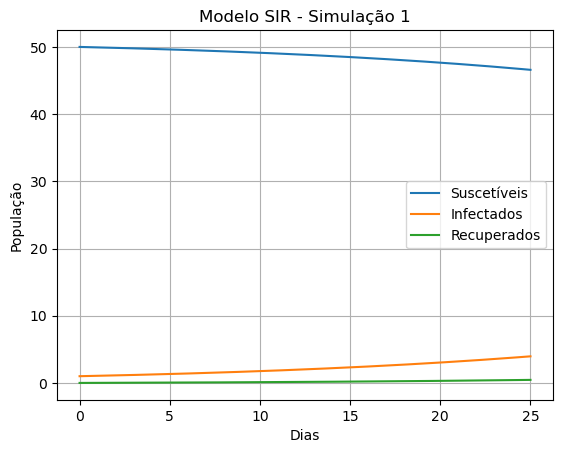

In [5]:
# Executar simulação
#t = np.linspace(0, N_t * dt, N_t + 1)
t = np.linspace(t0, tn, num_passo)  # vetor de tempo
y0 = [S0, I0, R0]                        # vetor de condições iniciais(PVI)

sol = rk4_system(sir_model(beta, gamma), y0, t)
S, I, R = sol.T                          # Transpor para obter S, I, R como vetores separados

plt.plot(t, S, label='Suscetíveis')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.xlabel('Dias')
plt.ylabel('População')
plt.title('Modelo SIR - Simulação 1')
plt.legend()
plt.grid()
plt.show()

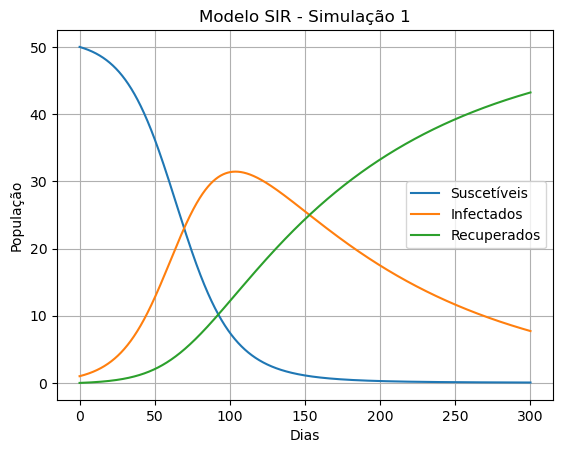

In [6]:
# Executar simulação com 300 dias para uma melhor visualização
#intervalo I = [t0,tn]
t0 = 0
tn = 300                   # tempo final em dias
dt = 0.1                   # passo(h) de tempo em dias
num_passo = int(((tn*24)/dt))

t = np.linspace(t0, tn, num_passo)  # vetor de tempo
y0 = [S0, I0, R0]                        # vetor de condições iniciais(PVI)

sol = rk4_system(sir_model(beta, gamma), y0, t)
S, I, R = sol.T                          # Transpor para obter S, I, R como vetores separados

plt.plot(t, S, label='Suscetíveis')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.xlabel('Dias')
plt.ylabel('População')
plt.title('Modelo SIR - Simulação 1')
plt.legend()
plt.grid()
plt.show()


## 🔬 Análise dos Resultados

- `Suscetíveis (S)`: O número de suscetíveis diminui rapidamente no início devido à rápida disseminação da doença, e depois a taxa de diminuição diminui à medida que o número de infectados diminui (facilmente observavel na escala de 300 dias).
- `Infectados (I)`: Começa baixo, cresce até um pico, por volta do dia 100, conforme a doença se espalha e depois diminui à medida que as pessoas se recuperam.
- `Recuperados (R)`: Começa em zero e aumenta continuamente conforme os infectados se recuperam.

**Interpretação**:
No início (dia 0), quase todos são suscetíveis e apenas uma pessoa está infectada. Com o passar do tempo, nota-se o número de infectados aumentar, os de suscetíveis diminuir rapidamente. A população recuperada aumenta durante todo o processo.


In [7]:

# Criar um DataFrame com os resultados
df_sir1 = pd.DataFrame({'Tempo (Dias)': t, 'Suscetíveis (S)': S, 'Infectados (I)': I, 'Recuperados (R)': R})

# Exibir as primeiras linhas do DataFrame
print("Primeiras linhas dos resultados da Simulação 1 (Modelo SIR):")
print(df_sir1.head())

# Exibir as últimas linhas do DataFrame
print("\nÚltimas linhas dos resultados da Simulação 1 (Modelo SIR):")
print(df_sir1.tail())

# Exibir informações estatísticas básicas
print("\nEstatísticas descritivas da Simulação 1 (Modelo SIR):")
print(df_sir1.describe())

# Encontrar o pico de infecções e o tempo em que ocorre
pico_infeccoes = df_sir1['Infectados (I)'].max()
tempo_pico = df_sir1.loc[df_sir1['Infectados (I)'].idxmax(), 'Tempo (Dias)']

print(f"\nPico de infecções: {pico_infeccoes:.2f} indivíduos, ocorrendo aproximadamente no dia {tempo_pico:.2f}")

# Calcular a população total em cada ponto do tempo para verificar se a soma S+I+R é constante
df_sir1['População Total'] = df_sir1['Suscetíveis (S)'] + df_sir1['Infectados (I)'] + df_sir1['Recuperados (R)']

print("\nVariação da População Total ao longo do tempo (deve ser constante para o modelo SIR):")
print(df_sir1[['Tempo (Dias)', 'População Total']].tail())

# Verificar se a população total se mantém constante (dentro de uma pequena tolerância)
populacao_inicial = df_sir1['População Total'][0]
diferenca_max_populacao = (df_sir1['População Total'] - populacao_inicial).abs().max()

print(f"\nDiferença máxima na População Total em relação ao início: {diferenca_max_populacao:.6f}")
if diferenca_max_populacao < 1e-9: # Usar uma tolerância pequena para comparação de ponto flutuante
    print("A População Total se manteve constante (dentro da tolerância), como esperado para o modelo SIR.")
else:
    print("A População Total não se manteve constante, pode haver um problema com a implementação do modelo ou RK4.")

# Tabela com valores em instantes específicos (ex: a cada 5 dias)
print("\nValores de S, I, R a cada 5 dias (Simulação 1 - Modelo SIR):")
print(df_sir1[df_sir1['Tempo (Dias)'] % 5 == 0])

Primeiras linhas dos resultados da Simulação 1 (Modelo SIR):
   Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
0      0.000000        50.000000        1.000000         0.000000
1      0.004167        49.999729        1.000237         0.000035
2      0.008333        49.999457        1.000473         0.000069
3      0.012500        49.999186        1.000710         0.000104
4      0.016667        49.998914        1.000947         0.000139

Últimas linhas dos resultados da Simulação 1 (Modelo SIR):
       Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
71995    299.983333         0.058329        7.718160        43.223511
71996    299.987500         0.058327        7.717894        43.223779
71997    299.991667         0.058324        7.717629        43.224047
71998    299.995833         0.058322        7.717363        43.224315
71999    300.000000         0.058320        7.717098        43.224583

Estatísticas descritivas da Simulação 1 (Modelo SIR):
       T

---
## Modelo SIR
### 📈 Simulação 2 -  (300 dias)
#### Objetivo:
Considere uma medida de distanciamento social que reduz o parâmetro β em quatro vezes e tempo final tn = 300 dias.

Para: $S0 = 49$, $I0 = 1$, $R0 = 0$, $tn = 300$ dias e $β/4$:

In [27]:
# Interpretação do modelo SIR:
# Parâmetros do modelo
beta_sir2 = beta/4               # taxa de infecção reduzida

#intervalo I = [t0,tn]
t0 = 0
tn = 300                    # tempo final em dias
dt = 0.1                    # passo(h) de tempo em dias
num_passo = int((tn/dt))



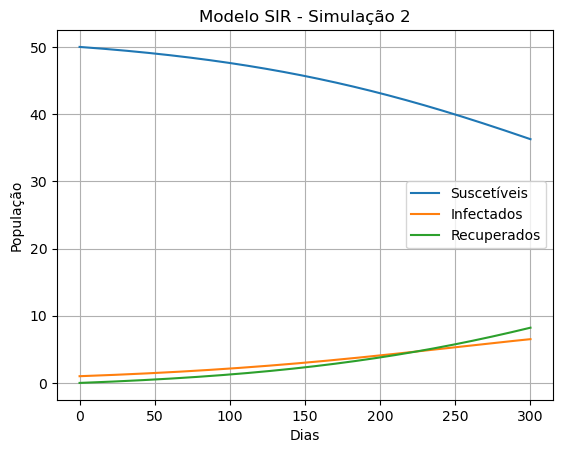

In [28]:
# Executar simulação
#t = np.linspace(0, N_t * dt, N_t + 1)
t = np.linspace(t0, tn, num_passo + 1)                  # vetor de tempo
y0 = [S0, I0, R0]                                       # vetor de condições iniciais(PVI)
sol = rk4_system(sir_model(beta_sir2, gamma), y0, t)
S, I, R = sol.T                                         # Transpor para obter S, I, R como vetores separados

plt.plot(t, S, label='Suscetíveis')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.xlabel('Dias')
plt.ylabel('População')
plt.title('Modelo SIR - Simulação 2')
plt.legend()
plt.grid()
plt.show()


## 🔬 Análise dos Resultados

- `Suscetíveis (S)`: A diminuição dos suscetíveis é muito mais lenta em comparação à Simulação 1. A curva desce gradualmente, indicando que menos pessoas são infectadas a cada instante.
- `Infectados (I)`: O pico de infectados é significativamente menor e ocorre mais tarde. Isso significa que a epidemia se espalha mais devagar e nunca atinge tantos infectados simultâneos quanto no cenário sem distanciamento.
- `Recuperados (R)`: O número de recuperados aumenta lentamente e se estabiliza em um valor menor, já que menos pessoas são infectadas no total.

**Interpretação**:
O distanciamento social (β menor) achata a curva de infecção, atrasando e reduzindo o pico epidêmico. Isso ajuda a evitar a sobrecarga do sistema de saúde e faz com que uma parcela maior da população permaneça não infectada ao final da simulação. A epidemia dura mais tempo, porém com intensidade muito menor.


In [29]:
# Criar um DataFrame com os resultados da Simulação 2
df_sir2 = pd.DataFrame({'Tempo (Dias)': t, 'Suscetíveis (S)': S, 'Infectados (I)': I, 'Recuperados (R)': R})

# Exibir as primeiras linhas do DataFrame
print("Primeiras linhas dos resultados da Simulação 2 (Modelo SIR):")
print(df_sir2.head())

# Exibir as últimas linhas do DataFrame
print("\nÚltimas linhas dos resultados da Simulação 2 (Modelo SIR):")
print(df_sir2.tail())

# Exibir informações estatísticas básicas
print("\nEstatísticas descritivas da Simulação 2 (Modelo SIR):")
print(df_sir2.describe())

# Encontrar o pico de infecções e o tempo em que ocorre
pico_infeccoes_sir2 = df_sir2['Infectados (I)'].max()
tempo_pico_sir2 = df_sir2.loc[df_sir2['Infectados (I)'].idxmax(), 'Tempo (Dias)']

print(f"\nPico de infecções na Simulação 2: {pico_infeccoes_sir2:.2f} indivíduos, ocorrendo aproximadamente no dia {tempo_pico_sir2:.2f}")

# Calcular a população total em cada ponto do tempo para verificar se a soma S+I+R é constante
df_sir2['População Total'] = df_sir2['Suscetíveis (S)'] + df_sir2['Infectados (I)'] + df_sir2['Recuperados (R)']

print("\nVariação da População Total ao longo do tempo (Simulação 2 - deve ser constante para o modelo SIR):")
print(df_sir2[['Tempo (Dias)', 'População Total']].tail())

# Verificar se a população total se mantém constante (dentro de uma pequena tolerância)
populacao_inicial_sir2 = df_sir2['População Total'][0]
diferenca_max_populacao_sir2 = (df_sir2['População Total'] - populacao_inicial_sir2).abs().max()

print(f"\nDiferença máxima na População Total em relação ao início (Simulação 2): {diferenca_max_populacao_sir2:.6f}")
if diferenca_max_populacao_sir2 < 1e-9: # Usar uma tolerância pequena para comparação de ponto flutuante
    print("A População Total se manteve constante (dentro da tolerância) na Simulação 2, como esperado para o modelo SIR.")
else:
    print("A População Total não se manteve constante na Simulação 2, pode haver um problema com a implementação do modelo ou RK4.")

# Tabela com valores em instantes específicos (ex: a cada 50 dias para ver a longo prazo)
print("\nValores de S, I, R a cada 50 dias (Simulação 2 - Modelo SIR):")
print(df_sir2[df_sir2['Tempo (Dias)'] % 50 == 0])

# Comparar o pico de infecções e o tempo do pico entre as duas simulações SIR
print("\nComparativo entre Simulação 1 e Simulação 2 (Modelo SIR):")
print(f"Simulação 1 (Sem distanciamento): Pico de {pico_infeccoes:.2f} infecções no dia {tempo_pico:.2f}")
print(f"Simulação 2 (Com distanciamento): Pico de {pico_infeccoes_sir2:.2f} infecções no dia {tempo_pico_sir2:.2f}")
print(f"Redução no pico de infecções: {((pico_infeccoes - pico_infeccoes_sir2) / pico_infeccoes) * 100:.2f}%")
print(f"Atraso no tempo do pico: {tempo_pico_sir2 - tempo_pico:.2f} dias")

# Comparar o número final de suscetíveis (aqueles que não foram infectados)
print(f"\nNúmero final de Suscetíveis (Dia {df_sir1['Tempo (Dias)'].iloc[-1]:.2f}):")
print(f"Simulação 1: {df_sir1['Suscetíveis (S)'].iloc[-1]:.2f}")
print(f"Simulação 2: {df_sir2['Suscetíveis (S)'].iloc[-1]:.2f}")
print(f"Diferença no final de suscetíveis: {df_sir2['Suscetíveis (S)'].iloc[-1] - df_sir1['Suscetíveis (S)'].iloc[-1]:.2f}")


Primeiras linhas dos resultados da Simulação 2 (Modelo SIR):
   Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
0           0.0        50.000000        1.000000         0.000000
1           0.1        49.998372        1.000795         0.000834
2           0.2        49.996742        1.001590         0.001668
3           0.3        49.995112        1.002385         0.002503
4           0.4        49.993480        1.003182         0.003339

Últimas linhas dos resultados da Simulação 2 (Modelo SIR):
      Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
2996         299.6        36.299018        6.503035         8.197948
2997         299.7        36.291333        6.505299         8.203368
2998         299.8        36.283647        6.507563         8.208790
2999         299.9        36.275961        6.509826         8.214214
3000         300.0        36.268273        6.512087         8.219639

Estatísticas descritivas da Simulação 2 (Modelo SIR):
       Tempo (

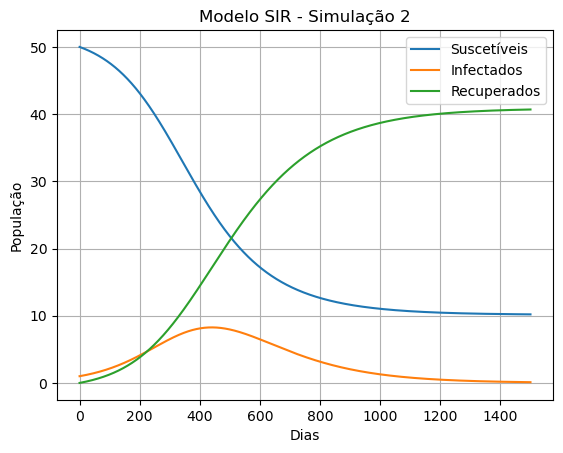

In [10]:
# Executar simulação com 1500 dias para uma melhor visualização
# #intervalo I = [t0,tn]
t0 = 0
tn = 1500                    # tempo final em dias
dt = 0.1                    # passo(h) de tempo em dias
num_passo = int((tn/dt))
# Executar simulação
#t = np.linspace(0, N_t * dt, N_t + 1)
t = np.linspace(t0, tn, num_passo + 1)                  # vetor de tempo
y0 = [S0, I0, R0]                                       # vetor de condições iniciais(PVI)
sol = rk4_system(sir_model(beta_sir2, gamma), y0, t)
S, I, R = sol.T                                         # Transpor para obter S, I, R como vetores separados

plt.plot(t, S, label='Suscetíveis')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.xlabel('Dias')
plt.ylabel('População')
plt.title('Modelo SIR - Simulação 2')
plt.legend()
plt.grid()
plt.show()


---
## Modelo SIRS
### 📈 Simulação 1 -  (300 dias)
#### Objetivo:
$\nu = 1/50$. Considera reinfecção com 50 dias de imunidade média. $\beta$ reduzido.

Para: $S0 = 49$, $I0 = 1$, $R0 = 0$, $tn = 300$ dias e $β/4$:

In [12]:
# Define o sistema de EDOs SIRS
def sirs_model(beta_sirs, gamma_sirs, nu1):
    """ Define o modelo SIR.
    Args:
        beta_sirs: Taxa de infecção.
        gamma_sirs: Taxa de recuperação.
    Returns:
        f: Função que define o sistema de EDOs SIR.
    """
    def f(t, y):
        S, I, R = y
        dS = -beta_sirs * S * I+ nu1 * R
        dI = beta_sirs * S * I - gamma_sirs * I
        dR = gamma_sirs * I - nu1 * R
        return np.array([dS, dI, dR])
    return f


In [13]:
# Interpretação do modelo SIRS:
# Parâmetros do modelo
nu1 = 1 / 50

#intervalo I = [t0,tn]
t0 = 0
tn = 300                    # tempo final em dias
dt = 0.1                    # passo(h) de tempo em dias
num_passo = int((tn/dt))



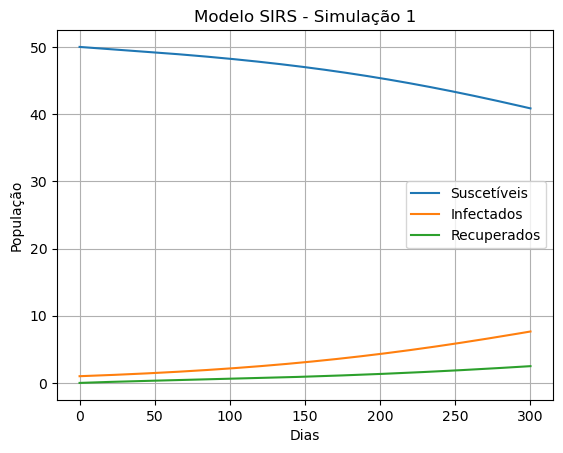

In [14]:
# Executar simulação
#t = np.linspace(0, N_t * dt, N_t + 1)
t = np.linspace(t0, tn, num_passo + 1)                  # vetor de tempo
y0 = [S0, I0, R0]                                       # vetor de condições iniciais(PVI)
sol = rk4_system(sirs_model(beta_sir2, gamma, nu1), y0, t)
S, I, R = sol.T                                         # Transpor para obter S, I, R como vetores separados

plt.plot(t, S, label='Suscetíveis')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.xlabel('Dias')
plt.ylabel('População')
plt.title('Modelo SIRS - Simulação 1')
plt.legend()
plt.grid()
plt.show()


## 🔬 Análise dos Resultados

Com perda média de imunidade após 50 dias e taxa de infecção reduzida:


- `Suscetíveis (S)`: O número de suscetíveis diminui lentamente no início, mas devido à perda de imunidade (indivíduos retornando de R para S), a população suscetível não cai para zero.
- `Infectados (I)`: A curva de infectados após 90 dias mostra um crescimento acelerado em comparação ao modelo SIR clássico. O pico de infectados é menor, mas a epidemia não se extingue completamente.
- `Recuperados (R)`: A população recuperada aumenta à medida que as pessoas se recuperam, mas depois diminui conforme a imunidade é perdida e os indivíduos retornam ao grupo dos suscetíveis. Isso cria um equilíbrio dinâmico entre os três grupos.

**Interpretação**:
Diferente do modelo SIR clássico, o modelo SIRS permite reinfecção. Como resultado, a epidemia não se extingue completamente. O sistema tende a um equilíbrio endêmico ou a um comportamento oscilatório, onde a doença permanece presente na população em um nível baixo, porém persistente. A perda de imunidade (parâmetro `nu`) é fundamental para esse comportamento de longo prazo.


In [15]:
# Criar um DataFrame com os resultados da Simulação 1 (SIRS)
df_sirs1 = pd.DataFrame({'Tempo (Dias)': t, 'Suscetíveis (S)': S, 'Infectados (I)': I, 'Recuperados (R)': R})

# Exibir as primeiras linhas do DataFrame
print("Primeiras linhas dos resultados da Simulação 1 (Modelo SIRS):")
print(df_sirs1.head())

# Exibir as últimas linhas do DataFrame
print("\nÚltimas linhas dos resultados da Simulação 1 (Modelo SIRS):")
print(df_sirs1.tail())

# Exibir informações estatísticas básicas
print("\nEstatísticas descritivas da Simulação 1 (Modelo SIRS):")
print(df_sirs1.describe())

# Encontrar o pico de infecções e o tempo em que ocorre
pico_infeccoes_sirs1 = df_sirs1['Infectados (I)'].max()
tempo_pico_sirs1 = df_sirs1.loc[df_sirs1['Infectados (I)'].idxmax(), 'Tempo (Dias)']

print(f"\nPico de infecções na Simulação 1 (SIRS): {pico_infeccoes_sirs1:.2f} indivíduos, ocorrendo aproximadamente no dia {tempo_pico_sirs1:.2f}")

# Calcular a população total em cada ponto do tempo para verificar se a soma S+I+R é constante
df_sirs1['População Total'] = df_sirs1['Suscetíveis (S)'] + df_sirs1['Infectados (I)'] + df_sirs1['Recuperados (R)']

print("\nVariação da População Total ao longo do tempo (Simulação 1 - SIRS):")
print(df_sirs1[['Tempo (Dias)', 'População Total']].tail())

# Verificar se a população total se mantém constante (dentro de uma pequena tolerância)
populacao_inicial_sirs1 = df_sirs1['População Total'][0]
diferenca_max_populacao_sirs1 = (df_sirs1['População Total'] - populacao_inicial_sirs1).abs().max()

print(f"\nDiferença máxima na População Total em relação ao início (Simulação 1 - SIRS): {diferenca_max_populacao_sirs1:.6f}")
if diferenca_max_populacao_sirs1 < 1e-9: # Usar uma tolerância pequena para comparação de ponto flutuante
    print("A População Total se manteve constante (dentro da tolerância) na Simulação 1 (SIRS).")
else:
    print("A População Total não se manteve constante na Simulação 1 (SIRS), pode haver um problema com a implementação do modelo ou RK4.")

# Tabela com valores em instantes específicos (ex: a cada 50 dias)
print("\nValores de S, I, R a cada 50 dias (Simulação 1 - Modelo SIRS):")
print(df_sirs1[df_sirs1['Tempo (Dias)'] % 50 == 0])

# Análise qualitativa adicional: Verificar se o número de infectados tende a um estado estacionário ou oscila
print("\nComportamento final dos Infectados (Simulação 1 - SIRS):")
print(df_sirs1['Infectados (I)'].tail())

Primeiras linhas dos resultados da Simulação 1 (Modelo SIRS):
   Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
0           0.0        50.000000        1.000000         0.000000
1           0.1        49.998373        1.000795         0.000833
2           0.2        49.996746        1.001590         0.001665
3           0.3        49.995119        1.002385         0.002495
4           0.4        49.993493        1.003182         0.003325

Últimas linhas dos resultados da Simulação 1 (Modelo SIRS):
      Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
2996         299.6        40.872316        7.637799         2.489885
2997         299.7        40.867133        7.641597         2.491270
2998         299.8        40.861950        7.645395         2.492656
2999         299.9        40.856765        7.649193         2.494042
3000         300.0        40.851579        7.652992         2.495428

Estatísticas descritivas da Simulação 1 (Modelo SIRS):
       Temp

## Modelo SIRS
### 📈 Simulação 2 -  (300 dias)
#### Objetivo:
Altera tempo médio de imunidade para 90 dias: $\nu = 1/90$.

Para: $S0 = 49$, $I0 = 1$, $R0 = 0$, $tn = 300$ dias e $β/4$:

In [16]:
# Interpretação do modelo SIRS:
# Parâmetros do modelo
nu1 = 1 / 90

#intervalo I = [t0,tn]
t0 = 0
tn = 300                    # tempo final em dias
dt = 0.1                    # passo(h) de tempo em dias
num_passo = int((tn/dt))



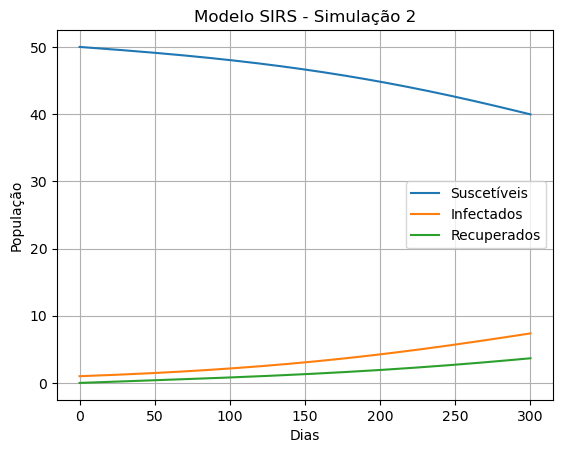

In [17]:
# Executar simulação
#t = np.linspace(0, N_t * dt, N_t + 1)
t = np.linspace(t0, tn, num_passo + 1)                  # vetor de tempo
y0 = [S0, I0, R0]                                       # vetor de condições iniciais(PVI)
sol = rk4_system(sirs_model(beta_sir2, gamma, nu1), y0, t)
S, I, R = sol.T                                         # Transpor para obter S, I, R como vetores separados

plt.plot(t, S, label='Suscetíveis')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.xlabel('Dias')
plt.ylabel('População')
plt.title('Modelo SIRS - Simulação 2')
plt.legend()
plt.grid()
plt.show()


## 🔬 Análise dos Resultados

- `Suscetíveis (S)`: A diminuição dos suscetíveis é muito mais lenta em comparação à Simulação 1. A curva desce gradualmente, indicando que menos pessoas são infectadas a cada instante.
- `Infectados (I)`: O pico de infectados é significativamente menor e ocorre mais tarde. Isso significa que a epidemia se espalha mais devagar e nunca atinge tantos infectados simultâneos quanto no cenário sem distanciamento.
- `Recuperados (R)`: O número de recuperados aumenta lentamente e se estabiliza em um valor menor, já que menos pessoas são infectadas no total.

**Interpretação**:
Observando os gráficos e os valores finais, a Simulação 2 (com imunidade mais duradoura, ν=1/90) tem um pico de infecções menor e mais tardio em comparação com a Simulação 1 (com imunidade menos duradoura, ν=1/50).
Isso sugere que uma imunidade mais longa retarda e atenua a epidemia inicial. O sistema SIRS, devido à reinfecção, não tende a um estado livre de doença, mas sim a um estado endêmico onde a doença persiste na população. A duração da imunidade (controlada por nu) influencia significativamente a dinâmica de longo prazo do sistema, afetando o tamanho do pico e o nível endêmico.
A Simulação 2, com imunidade mais duradoura, representa um cenário mais favorável em termos de controle da doença.


In [18]:
# Criar um DataFrame com os resultados da Simulação 2 (SIRS)
df_sirs2 = pd.DataFrame({'Tempo (Dias)': t, 'Suscetíveis (S)': S, 'Infectados (I)': I, 'Recuperados (R)': R})

# Exibir as primeiras linhas do DataFrame
print("Primeiras linhas dos resultados da Simulação 2 (Modelo SIRS):")
print(df_sirs2.head())

# Exibir as últimas linhas do DataFrame
print("\nÚltimas linhas dos resultados da Simulação 2 (Modelo SIRS):")
print(df_sirs2.tail())

# Exibir informações estatísticas básicas
print("\nEstatísticas descritivas da Simulação 2 (Modelo SIRS):")
print(df_sirs2.describe())

# Encontrar o pico de infecções e o tempo em que ocorre
pico_infeccoes_sirs2 = df_sirs2['Infectados (I)'].max()
tempo_pico_sirs2 = df_sirs2.loc[df_sirs2['Infectados (I)'].idxmax(), 'Tempo (Dias)']

print(f"\nPico de infecções na Simulação 2 (SIRS): {pico_infeccoes_sirs2:.2f} indivíduos, ocorrendo aproximadamente no dia {tempo_pico_sirs2:.2f}")

# Calcular a população total em cada ponto do tempo para verificar se a soma S+I+R é constante
df_sirs2['População Total'] = df_sirs2['Suscetíveis (S)'] + df_sirs2['Infectados (I)'] + df_sirs2['Recuperados (R)']

print("\nVariação da População Total ao longo do tempo (Simulação 2 - SIRS):")
print(df_sirs2[['Tempo (Dias)', 'População Total']].tail())

# Verificar se a população total se mantém constante (dentro de uma pequena tolerância)
populacao_inicial_sirs2 = df_sirs2['População Total'][0]
diferenca_max_populacao_sirs2 = (df_sirs2['População Total'] - populacao_inicial_sirs2).abs().max()

print(f"\nDiferença máxima na População Total em relação ao início (Simulação 2 - SIRS): {diferenca_max_populacao_sirs2:.6f}")
if diferenca_max_populacao_sirs2 < 1e-9: # Usar uma tolerância pequena para comparação de ponto flutuante
    print("A População Total se manteve constante (dentro da tolerância) na Simulação 2 (SIRS).")
else:
    print("A População Total não se manteve constante na Simulação 2 (SIRS), pode haver um problema com a implementação do modelo ou RK4.")

# Tabela com valores em instantes específicos (ex: a cada 50 dias)
print("\nValores de S, I, R a cada 50 dias (Simulação 2 - Modelo SIRS):")
print(df_sirs2[df_sirs2['Tempo (Dias)'] % 50 == 0])

# Análise qualitativa adicional: Verificar se o número de infectados tende a um estado estacionário ou oscila
print("\nComportamento final dos Infectados (Simulação 2 - SIRS):")
print(df_sirs2['Infectados (I)'].tail())

# Comparar o pico de infecções e o tempo do pico entre as duas simulações SIRS
print("\nComparativo entre Simulação 1 (ν=1/50) e Simulação 2 (ν=1/90) - Modelo SIRS:")
print(f"Simulação 1 (ν=1/50): Pico de {pico_infeccoes_sirs1:.2f} infecções no dia {tempo_pico_sirs1:.2f}")
print(f"Simulação 2 (ν=1/90): Pico de {pico_infeccoes_sirs2:.2f} infecções no dia {tempo_pico_sirs2:.2f}")

# Comparar o comportamento de longo prazo dos Infectados (últimos valores)
print("\nComparativo do número final de Infectados (Dia 300):")
print(f"Simulação 1 (ν=1/50): {df_sirs1['Infectados (I)'].iloc[-1]:.2f}")
print(f"Simulação 2 (ν=1/90): {df_sirs2['Infectados (I)'].iloc[-1]:.2f}")


Primeiras linhas dos resultados da Simulação 2 (Modelo SIRS):
   Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
0           0.0        50.000000        1.000000         0.000000
1           0.1        49.998372        1.000795         0.000833
2           0.2        49.996744        1.001590         0.001666
3           0.3        49.995116        1.002385         0.002499
4           0.4        49.993487        1.003182         0.003331

Últimas linhas dos resultados da Simulação 2 (Modelo SIRS):
      Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)
2996         299.6        39.981740        7.358171         3.660089
2997         299.7        39.976230        7.361616         3.662154
2998         299.8        39.970718        7.365061         3.664220
2999         299.9        39.965206        7.368507         3.666287
3000         300.0        39.959694        7.371952         3.668354

Estatísticas descritivas da Simulação 2 (Modelo SIRS):
       Temp

---
## Modelo SIRV
### 📈 Simulação 1 -  (300 dias)
#### Objetivo:
Vacinação com $p = 0.0005$, imunidade média de 50 dias.

Para: $S0 = 49$, $I0 = 1$, $R0 = 0$, $tn = 300$ dias e $β/4$:

In [19]:
# Define o sistema de EDOs SIRV
def sirv_model(beta_sirv, gamma_sirv, nu_sirv, p_sirv):
    """ Define o modelo SIR.
    Args:
        beta_sirs: Taxa de infecção.
        gamma_sirs: Taxa de recuperação.
    Returns:
        f: Função que define o sistema de EDOs SIR.
    """
    def f(t, y):
        S, I, R, V = y
        dS = -beta_sirv * S * I + nu_sirv * R - p_sirv * S
        dI = beta_sirv * S * I - gamma_sirv * I
        dR = gamma_sirv * I - nu_sirv * R
        dV = p_sirv * S
        return np.array([dS, dI, dR, dV])
    return f


In [20]:
# Interpretação do modelo SIRV:
# Parâmetros do modelo
nu_sirv1 = 1 / 90
p_sirv1 = 0.0005  # taxa de vacinação
V0 = 0

#intervalo I = [t0,tn]
t0 = 0
tn = 300                    # tempo final em dias
dt = 0.1                    # passo(h) de tempo em dias
num_passo = int((tn/dt))



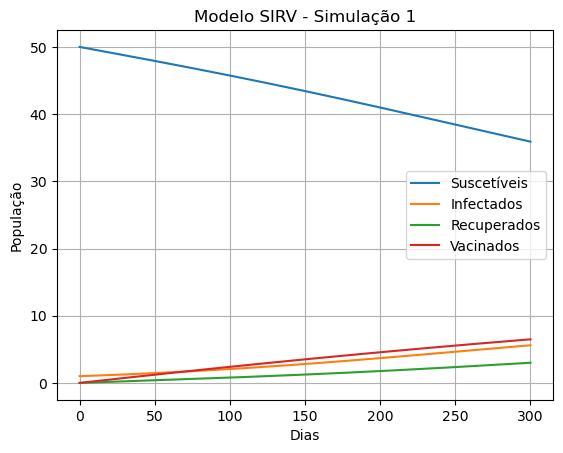

In [21]:
# Executar simulação
#t = np.linspace(0, N_t * dt, N_t + 1)
t = np.linspace(t0, tn, num_passo + 1)                  # vetor de tempo
y0 = [S0, I0, R0, V0]                                       # vetor de condições iniciais(PVI)
sol = rk4_system(sirv_model(beta_sir2, gamma, nu_sirv1, p_sirv1), y0, t)
S, I, R, V = sol.T                                         # Transpor para obter S, I, R como vetores separados

plt.plot(t, S, label='Suscetíveis')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.plot(t, V, label='Vacinados')
plt.xlabel('Dias')
plt.ylabel('População')
plt.title('Modelo SIRV - Simulação 1')
plt.legend()
plt.grid()
plt.show()


## 🔬 Análise dos Resultados

- `Suscetíveis (S)`: A população suscetível diminui de forma gradual, tanto pelo contágio quanto pela vacinação. A vacinação acelera a queda de S, contribuindo para o controle da epidemia.
- `Infectados (I)`: O pico de infectados é moderado e ocorre mais tarde no tempo. A curva apresenta uma subida suave, indicando que o avanço da doença foi desacelerado.
- `Recuperados (R)`: A curva de recuperados cresce, mas tende a se estabilizar, já que menos pessoas são infectadas com o passar do tempo.
- `Vacinados (V)`: A vacinação progride continuamente. A curva de V cresce rapidamente e atinge um patamar elevado, indicando boa cobertura vacinal ao longo dos 300 dias.

**Interpretação**:
A vacinação eficiente com alta adesão contribui fortemente para conter a epidemia. O número de infectados simultâneos é menor e o pico ocorre mais tarde. A estratégia de imunização reduz a necessidade de infecção natural para conter o vírus, mantendo grande parte da população protegida sem adoecer.


In [22]:
# Análise do Modelo SIRV - Simulação 1
# Criar um DataFrame com os resultados da Simulação 1 (SIRV)
df_sirv1 = pd.DataFrame({'Tempo (Dias)': t, 'Suscetíveis (S)': S, 'Infectados (I)': I, 'Recuperados (R)': R, 'Vacinados (V)': V})

# Exibir as primeiras linhas do DataFrame
print("Primeiras linhas dos resultados da Simulação 1 (Modelo SIRV):")
print(df_sirv1.head())

# Exibir as últimas linhas do DataFrame
print("\nÚltimas linhas dos resultados da Simulação 1 (Modelo SIRV):")
print(df_sirv1.tail())

# Exibir informações estatísticas básicas
print("\nEstatísticas descritivas da Simulação 1 (Modelo SIRV):")
print(df_sirv1.describe())

# Encontrar o pico de infecções e o tempo em que ocorre
pico_infeccoes_sirv1 = df_sirv1['Infectados (I)'].max()
tempo_pico_sirv1 = df_sirv1.loc[df_sirv1['Infectados (I)'].idxmax(), 'Tempo (Dias)']

print(f"\nPico de infecções na Simulação 1 (SIRV): {pico_infeccoes_sirv1:.2f} indivíduos, ocorrendo aproximadamente no dia {tempo_pico_sirv1:.2f}")

# Calcular a população total em cada ponto do tempo para verificar se a soma S+I+R+V é constante
df_sirv1['População Total'] = df_sirv1['Suscetíveis (S)'] + df_sirv1['Infectados (I)'] + df_sirv1['Recuperados (R)'] + df_sirv1['Vacinados (V)']

print("\nVariação da População Total ao longo do tempo (Simulação 1 - SIRV):")
print(df_sirv1[['Tempo (Dias)', 'População Total']].tail())

# Verificar se a população total se mantém constante (dentro de uma pequena tolerância)
populacao_inicial_sirv1 = df_sirv1['População Total'][0]
diferenca_max_populacao_sirv1 = (df_sirv1['População Total'] - populacao_inicial_sirv1).abs().max()

print(f"\nDiferença máxima na População Total em relação ao início (Simulação 1 - SIRV): {diferenca_max_populacao_sirv1:.6f}")
if diferenca_max_populacao_sirv1 < 1e-9: # Usar uma tolerância pequena para comparação de ponto flutuante
    print("A População Total se manteve constante (dentro da tolerância) na Simulação 1 (SIRV), como esperado.")
else:
    print("A População Total não se manteve constante na Simulação 1 (SIRV), pode haver um problema com a implementação do modelo ou RK4.")

# Tabela com valores em instantes específicos (ex: a cada 50 dias)
print("\nValores de S, I, R, V a cada 50 dias (Simulação 1 - Modelo SIRV):")
print(df_sirv1[df_sirv1['Tempo (Dias)'] % 50 == 0])

# Análise qualitativa adicional: Verificar o comportamento final dos grupos
print("\nComportamento final dos grupos (Simulação 1 - SIRV):")
print(df_sirv1[['Suscetíveis (S)', 'Infectados (I)', 'Recuperados (R)', 'Vacinados (V)']].tail())

# Comparar com SIRS Simulação 2 (mesmos beta e nu, mas sem vacinação)
print("\nComparativo: SIRV Simulação 1 (Vacinação) vs SIRS Simulação 2 (Sem Vacinação):")
print(f"SIRV Simulação 1: Pico de {pico_infeccoes_sirv1:.2f} infecções no dia {tempo_pico_sirv1:.2f}")
print(f"SIRS Simulação 2: Pico de {pico_infeccoes_sirs2:.2f} infecções no dia {tempo_pico_sirs2:.2f}")
print(f"Redução no pico de infecções devido à vacinação: {((pico_infeccoes_sirs2 - pico_infeccoes_sirv1) / pico_infeccoes_sirs2) * 100:.2f}%")
print(f"Atraso ou adiantamento no tempo do pico devido à vacinação: {tempo_pico_sirv1 - tempo_pico_sirs2:.2f} dias")

print(f"\nNúmero final de Suscetíveis (Dia {df_sirv1['Tempo (Dias)'].iloc[-1]:.2f}):")
print(f"SIRV Simulação 1: {df_sirv1['Suscetíveis (S)'].iloc[-1]:.2f}")
print(f"SIRS Simulação 2: {df_sirs2['Suscetíveis (S)'].iloc[-1]:.2f}")
print(f"Diferença no final de suscetíveis (mais em SIRS sem vacina): {df_sirs2['Suscetíveis (S)'].iloc[-1] - df_sirv1['Suscetíveis (S)'].iloc[-1]:.2f}")

print(f"\nNúmero final de Vacinados (SIRV Simulação 1): {df_sirv1['Vacinados (V)'].iloc[-1]:.2f}")

# Verificação da contribuição da vacinação na redução de suscetíveis
print(f"\nSuscetíveis removidos pela infecção/recuperação (SIRS Sim 2): {S0 - df_sirs2['Suscetíveis (S)'].iloc[-1]:.2f}")
print(f"Suscetíveis removidos pela infecção/recuperação OU vacinação (SIRV Sim 1): {S0 - df_sirv1['Suscetíveis (S)'].iloc[-1]:.2f}")
print(f"População que foi vacinada (SIRV Sim 1): {df_sirv1['Vacinados (V)'].iloc[-1]:.2f}")
print(f"População que foi infectada/recuperada (SIRV Sim 1): {df_sirv1['Recuperados (R)'].iloc[-1]:.2f}")
# Note que S0 - S_final_SIRV1 deveria ser aproximadamente R_final_SIRV1 + V_final_SIRV1 (desconsiderando I_final que é pequeno)
print(f"S0 - S_final_SIRV1: {S0 - df_sirv1['Suscetíveis (S)'].iloc[-1]:.2f}")
print(f"R_final_SIRV1 + V_final_SIRV1: {df_sirv1['Recuperados (R)'].iloc[-1] + df_sirv1['Vacinados (V)'].iloc[-1]:.2f}")

Primeiras linhas dos resultados da Simulação 1 (Modelo SIRV):
   Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)  \
0           0.0        50.000000        1.000000         0.000000   
1           0.1        49.995872        1.000795         0.000833   
2           0.2        49.991745        1.001590         0.001666   
3           0.3        49.987617        1.002385         0.002499   
4           0.4        49.983489        1.003181         0.003331   

   Vacinados (V)  
0       0.000000  
1       0.002500  
2       0.005000  
3       0.007499  
4       0.009998  

Últimas linhas dos resultados da Simulação 1 (Modelo SIRV):
      Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)  \
2996         299.6        35.922611        5.597174         2.999941   
2997         299.7        35.917604        5.599054         3.001272   
2998         299.8        35.912596        5.600935         3.002603   
2999         299.9        35.907589        5.602815         

---
## Modelo SIRV
### 📈 Simulação 2 -  (300 dias)
#### Objetivo:
Taxa de vacinação reduzida: $p = 0.0001$.

Para: $S0 = 49$, $I0 = 1$, $R0 = 0$, $V0 = 0$, $tn = 300$ dias e $β/4$:

In [23]:
# Interpretação do modelo SIRV:
# Parâmetros do modelo
nu_sirv2 = 1 / 90
p_sirv2 = 0.0001  # taxa de vacinação
V0 = 0

#intervalo I = [t0,tn]
t0 = 0
tn = 300                    # tempo final em dias
dt = 0.1                    # passo(h) de tempo em dias
num_passo = int((tn/dt))



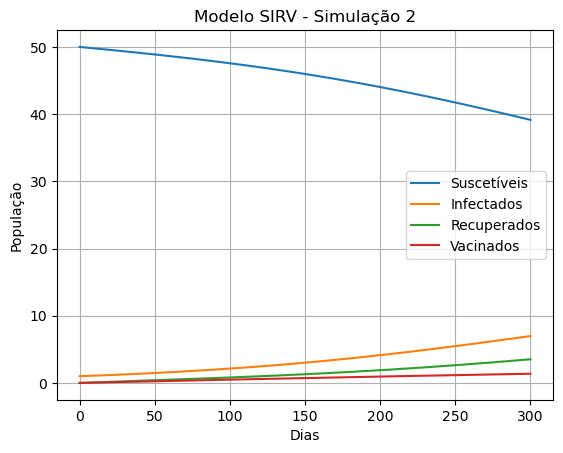

In [24]:
# Executar simulação
#t = np.linspace(0, N_t * dt, N_t + 1)
t = np.linspace(t0, tn, num_passo + 1)                  # vetor de tempo
y0 = [S0, I0, R0, V0]                                       # vetor de condições iniciais(PVI)
sol = rk4_system(sirv_model(beta_sir2, gamma, nu_sirv2, p_sirv2), y0, t)
S, I, R, V = sol.T                                         # Transpor para obter S, I, R como vetores separados

plt.plot(t, S, label='Suscetíveis')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.plot(t, V, label='Vacinados')
plt.xlabel('Dias')
plt.ylabel('População')
plt.title('Modelo SIRV - Simulação 2')
plt.legend()
plt.grid()
plt.show()


## 🔬 Análise dos Resultados

- `Suscetíveis (S)`: A redução de suscetíveis é mais lenta, pois a vacinação tem menor adesão. A maior parte da queda em S ocorre por infecção, e não por vacinação.
- `Infectados (I)`: O pico de infectados é mais alto e ocorre mais cedo em comparação à Simulação 1. Isso indica que a vacinação não foi suficiente para frear o contágio de forma eficaz.
- `Recuperados (R)`: O número de recuperados aumenta rapidamente e atinge valores maiores, o que indica maior propagação da doença.
- `Vacinados (V)`: A curva de vacinados cresce devagar e atinge um valor baixo ao final do período de simulação.

**Interpretação**:
Com uma taxa de vacinação muito baixa, o efeito da imunização é limitado. O vírus se espalha com maior velocidade e intensidade, levando a uma epidemia mais agressiva. Embora haja algum efeito protetivo, a vacinação com baixa adesão não impede um pico significativo de infecções.


In [25]:
# prompt: Analizar o modelo SIRV - simulação 2

# Análise do Modelo SIRV - Simulação 2
# Criar um DataFrame com os resultados da Simulação 2 (SIRV)
df_sirv2 = pd.DataFrame({'Tempo (Dias)': t, 'Suscetíveis (S)': S, 'Infectados (I)': I, 'Recuperados (R)': R, 'Vacinados (V)': V})

# Exibir as primeiras linhas do DataFrame
print("Primeiras linhas dos resultados da Simulação 2 (Modelo SIRV):")
print(df_sirv2.head())

# Exibir as últimas linhas do DataFrame
print("\nÚltimas linhas dos resultados da Simulação 2 (Modelo SIRV):")
print(df_sirv2.tail())

# Exibir informações estatísticas básicas
print("\nEstatísticas descritivas da Simulação 2 (Modelo SIRV):")
print(df_sirv2.describe())

# Encontrar o pico de infecções e o tempo em que ocorre
pico_infeccoes_sirv2 = df_sirv2['Infectados (I)'].max()
tempo_pico_sirv2 = df_sirv2.loc[df_sirv2['Infectados (I)'].idxmax(), 'Tempo (Dias)']

print(f"\nPico de infecções na Simulação 2 (SIRV): {pico_infeccoes_sirv2:.2f} indivíduos, ocorrendo aproximadamente no dia {tempo_pico_sirv2:.2f}")

# Calcular a população total em cada ponto do tempo para verificar se a soma S+I+R+V é constante
df_sirv2['População Total'] = df_sirv2['Suscetíveis (S)'] + df_sirv2['Infectados (I)'] + df_sirv2['Recuperados (R)'] + df_sirv2['Vacinados (V)']

print("\nVariação da População Total ao longo do tempo (Simulação 2 - SIRV):")
print(df_sirv2[['Tempo (Dias)', 'População Total']].tail())

# Verificar se a população total se mantém constante (dentro de uma pequena tolerância)
populacao_inicial_sirv2 = df_sirv2['População Total'][0]
diferenca_max_populacao_sirv2 = (df_sirv2['População Total'] - populacao_inicial_sirv2).abs().max()

print(f"\nDiferença máxima na População Total em relação ao início (Simulação 2 - SIRV): {diferenca_max_populacao_sirv2:.6f}")
if diferenca_max_populacao_sirv2 < 1e-9: # Usar uma tolerância pequena para comparação de ponto flutuante
    print("A População Total se manteve constante (dentro da tolerância) na Simulação 2 (SIRV), como esperado.")
else:
    print("A População Total não se manteve constante na Simulação 2 (SIRV), pode haver um problema com a implementação do modelo ou RK4.")

# Tabela com valores em instantes específicos (ex: a cada 50 dias)
print("\nValores de S, I, R, V a cada 50 dias (Simulação 2 - Modelo SIRV):")
print(df_sirv2[df_sirv2['Tempo (Dias)'] % 50 == 0])

# Análise qualitativa adicional: Verificar o comportamento final dos grupos
print("\nComportamento final dos grupos (Simulação 2 - SIRV):")
print(df_sirv2[['Suscetíveis (S)', 'Infectados (I)', 'Recuperados (R)', 'Vacinados (V)']].tail())

# Comparar com SIRV Simulação 1 (mesmo nu, beta, mas p maior)
print("\nComparativo: SIRV Simulação 1 (p=0.0005) vs SIRV Simulação 2 (p=0.0001):")
print(f"SIRV Simulação 1 (p=0.0005): Pico de {pico_infeccoes_sirv1:.2f} infecções no dia {tempo_pico_sirv1:.2f}")
print(f"SIRV Simulação 2 (p=0.0001): Pico de {pico_infeccoes_sirv2:.2f} infecções no dia {tempo_pico_sirv2:.2f}")
print(f"Redução no pico de infecções com maior taxa de vacinação (p=0.0005 vs p=0.0001): {((pico_infeccoes_sirv2 - pico_infeccoes_sirv1) / pico_infeccoes_sirv2) * 100:.2f}%")
print(f"Atraso ou adiantamento no tempo do pico com maior taxa de vacinação: {tempo_pico_sirv1 - tempo_pico_sirv2:.2f} dias")

print(f"\nNúmero final de Suscetíveis (Dia {df_sirv2['Tempo (Dias)'].iloc[-1]:.2f}):")
print(f"SIRV Simulação 1 (p=0.0005): {df_sirv1['Suscetíveis (S)'].iloc[-1]:.2f}")
print(f"SIRV Simulação 2 (p=0.0001): {df_sirv2['Suscetíveis (S)'].iloc[-1]:.2f}")
print(f"Diferença no final de suscetíveis (maior p resulta em menos suscetíveis): {df_sirv1['Suscetíveis (S)'].iloc[-1] - df_sirv2['Suscetíveis (S)'].iloc[-1]:.2f}")

print(f"\nNúmero final de Vacinados (SIRV Simulação 1 vs 2):")
print(f"SIRV Simulação 1 (p=0.0005): {df_sirv1['Vacinados (V)'].iloc[-1]:.2f}")
print(f"SIRV Simulação 2 (p=0.0001): {df_sirv2['Vacinados (V)'].iloc[-1]:.2f}")

# Verificar o número final de recuperados
print(f"\nNúmero final de Recuperados (SIRV Simulação 1 vs 2):")
print(f"SIRV Simulação 1 (p=0.0005): {df_sirv1['Recuperados (R)'].iloc[-1]:.2f}")
print(f"SIRV Simulação 2 (p=0.0001): {df_sirv2['Recuperados (R)'].iloc[-1]:.2f}")
# Nota: Com menor taxa de vacinação, mais pessoas se tornam imunes através da infecção (maior R final).

Primeiras linhas dos resultados da Simulação 2 (Modelo SIRV):
   Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)  \
0           0.0        50.000000        1.000000         0.000000   
1           0.1        49.997872        1.000795         0.000833   
2           0.2        49.995744        1.001590         0.001666   
3           0.3        49.993616        1.002385         0.002499   
4           0.4        49.991487        1.003182         0.003331   

   Vacinados (V)  
0         0.0000  
1         0.0005  
2         0.0010  
3         0.0015  
4         0.0020  

Últimas linhas dos resultados da Simulação 2 (Modelo SIRV):
      Tempo (Dias)  Suscetíveis (S)  Infectados (I)  Recuperados (R)  \
2996         299.6        39.166456        6.957776         3.512868   
2997         299.7        39.161096        6.960848         3.514763   
2998         299.8        39.155736        6.963921         3.516659   
2999         299.9        39.150375        6.966994         

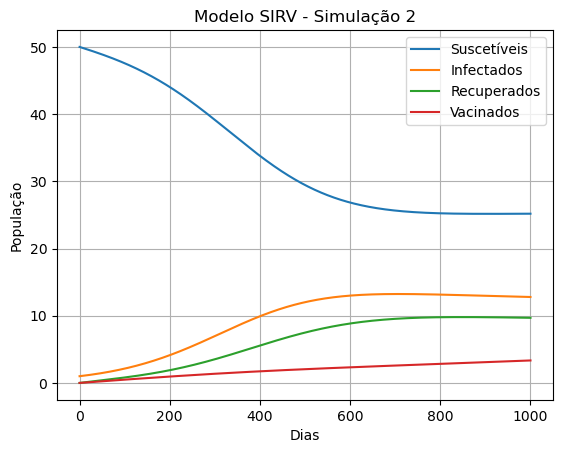

In [26]:
# Executar simulação com 1000 dias para uma melhor visualização
# #intervalo I = [t0,tn]
t0 = 0
tn = 1000                    # tempo final em dias
dt = 0.1                    # passo(h) de tempo em dias
num_passo = int((tn/dt))

# Executar simulação
#t = np.linspace(0, N_t * dt, N_t + 1)
t = np.linspace(t0, tn, num_passo + 1)                  # vetor de tempo
y0 = [S0, I0, R0, V0]                                       # vetor de condições iniciais(PVI)
sol = rk4_system(sirv_model(beta_sir2, gamma, nu_sirv2, p_sirv2), y0, t)
S, I, R, V = sol.T                                         # Transpor para obter S, I, R como vetores separados

plt.plot(t, S, label='Suscetíveis')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.plot(t, V, label='Vacinados')
plt.xlabel('Dias')
plt.ylabel('População')
plt.title('Modelo SIRV - Simulação 2')
plt.legend()
plt.grid()
plt.show()


---
## Conclusão

Neste trabalho, empregamos o método de Runge-Kutta de quarta ordem (RK4) para simular a dinâmica de propagação de doenças em três modelos epidemiológicos distintos: SIR, SIRS e SIRV. O RK4, sendo um método numérico de alta ordem (quarta ordem), provou ser uma ferramenta eficaz e robusta para aproximar as soluções desses sistemas de Equações Diferenciais Ordinárias (EDOs). Sua precisão é significativamente superior à de métodos de ordem inferior, como o método de Euler, minimizando o erro de truncamento a cada passo de tempo e fornecendo aproximações mais fiéis às trajetórias das populações suscetíveis (S), infectadas (I), recuperadas (R) e, no modelo SIRV, vacinadas (V).

A implementação do RK4 exigiu a formulação correta dos sistemas de EDOs para cada modelo (SIR, SIRS, SIRV) e a aplicação iterativa das fórmulas de cálculo dos coeficientes $k_1, k_2, k_3, k_4$ em cada passo de tempo. A estabilidade do método foi evidente nos gráficos gerados, que apresentaram curvas suaves e consistentes com a dinâmica esperada para cada modelo, sem oscilações espúrias ou divergências observadas em métodos menos estáveis para o tamanho de passo utilizado.

Em termos de erros, o método RK4 possui um erro de truncamento local de ordem $O(h^5)$ e um erro global de ordem $O(h^4)$, onde $h$ é o tamanho do passo. Isso significa que a diminuição do tamanho do passo leva a um aumento significativo na precisão das aproximações. A escolha de $dt=0.1$ dias em todas as simulações forneceu um bom equilíbrio entre precisão e custo computacional para os horizontes de tempo simulados. Embora não tenhamos calculado explicitamente o erro em comparação com uma solução analítica (que geralmente não existe para esses sistemas não lineares), a consistência das curvas, a preservação da população total e a observação dos comportamentos qualitativos esperados para cada modelo (extinção no SIR, endemicidade no SIRS/SIRV) indicam que o método RK4 produziu resultados confiáveis.

A eficiência do método RK4 é maior do que métodos de menor ordem para um mesmo nível de precisão desejado, pois permite o uso de passos de tempo maiores para atingir a mesma acurácia. No entanto, a cada passo, o RK4 exige quatro avaliações da função que define o sistema de EDOs (para calcular $k_1, k_2, k_3, k_4$), tornando-o computacionalmente mais intensivo por passo do que, por exemplo, o método de Euler (que exige apenas uma avaliação). Para sistemas grandes ou simulações de longo prazo com passo de tempo muito pequeno, a eficiência computacional pode se tornar um fator a considerar, levando à exploração de métodos numéricos adaptativos ou de maior ordem, mas para este estudo com populações e horizontes de tempo moderados, o RK4 demonstrou ser eficientemente preciso.

Em suma, a aplicação do método de Runge-Kutta de quarta ordem foi bem-sucedida na simulação dos modelos epidemiológicos, permitindo a análise da dinâmica de diferentes cenários de epidemia. Os resultados obtidos foram qualitativamente consistentes com a teoria epidemiológica e a alta ordem do método contribuiu para a precisão das aproximações numéricas. Este trabalho reforça a importância dos métodos numéricos no estudo de fenômenos complexos modelados por EDOs, como a propagação de doenças, e a capacidade do RK4 em fornecer soluções confiáveis para tais problemas.


## 📚 Referências

[1] Burden, R. L., & Faires, J. D. (2010). *Numerical Analysis* (9th ed.). Cengage Learning.

[2] Svein Linge and Hans Petter Langtangen (2020) Programming for Computations - Python, second edition.
Springer Open.

[3] COUTTO FILHO, Milton Brown do; FLÔR, Vinícius Biajoni Braga. *Computação numérica: métodos e implementações*. 2. ed. rev. e ampl. São Paulo: Blucher, 2017.
